In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sys
sys.path.insert(0, '/Users/canaguier/Desktop/LKB/multiple_scattering')

In [2]:
import collective_Smatrix as tools
import platonic_solid as positions

In [3]:
# number of multipoles to be included
lmax = 8
Nsph = 2*lmax*(2*lmax+1)

# ring radius
ka = np.pi

# particle pseudo-radius
kR = 0.8

In [4]:
# generate positions on the vertices of a platonic solid
importlib.reload(positions)

# tetrahedron (Nring=4)
N = 4+1
pos = np.zeros((3,N))
pos[:,:(N-1)] = positions.platonic(4, ka)
print(pos)

[[ 1.81379936  1.81379936 -1.81379936 -1.81379936  0.        ]
 [ 1.81379936 -1.81379936  1.81379936 -1.81379936  0.        ]
 [ 1.81379936 -1.81379936 -1.81379936  1.81379936  0.        ]]


In [11]:
# optical properties of the objects
# for an artificial dielectric
eps0 = 10
eps = eps0 + np.zeros(N, dtype=np.complex_)
# add absorption for the central (last) dipole
eps[N-1] = (np.sqrt(eps0)+0.1*1j)**2
print(eps)

[10.  +0.j         10.  +0.j         10.  +0.j         10.  +0.j
  9.99+0.63245553j]


In [17]:
# clausius-Mossoti relation
alpha_0 = 4*np.pi*(eps-1)/(eps+2)*kR**3
# inclusion of radiative correction
alpha = alpha_0/(1-1j*alpha_0/(6*np.pi))
print(alpha)
print(np.abs(alpha)**2/(6*np.pi))
print(np.imag(alpha)-np.abs(alpha)**2/(6*np.pi))

[4.52869384+1.15934562j 4.52869384+1.15934562j 4.52869384+1.15934562j
 4.52869384+1.15934562j 4.49329482+1.23018291j]
[1.15934562 1.15934562 1.15934562 1.15934562 1.15138247]
[-2.22044605e-16 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
  7.88004401e-02]


In [6]:
# buliding the S matrix of size Nsph by Nsph
importlib.reload(tools)
S = tools.matrix_Sdip(pos,alpha,lmax)

In [20]:
print(pos[:,[N-1]], alpha[[N-1]])

[[0.]
 [0.]
 [0.]] [4.49329482+1.23018291j]


In [7]:
# for comparison, same with only central absorber
importlib.reload(tools)
S_CA = tools.matrix_Sdip(pos[:,[N-1]], alpha[[N-1]], lmax)

In [23]:
# singular value decomposition (Sigma is a numpy vector)
U, Sigma, V = np.linalg.svd(S)
U_CA, Sigma_CA, V_CA = np.linalg.svd(S_CA)

# STRANGE VALUE AT 409 (complete) and 403 (CA)

In [9]:
# get the singular values for the absorption operator
abstot = 1-Sigma*Sigma
abs_CA = 1-Sigma_CA*Sigma_CA

In [10]:
print('Number of surrounding dipoles :',N-1)
print('The maximum abs goes from', max(abs_CA), 'to', max(abstot))
print('The relative increase of the max absolute value is', 100*(max(abstot)-max(abs_CA))/max(abs_CA))

Number of surrounding dipoles : 4
The maximum abs goes from 1.1550760348200129e-12 to 0.07872163595429316
The relative increase of the max absolute value is 6815277399933.65


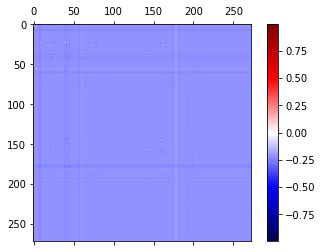

In [21]:
importlib.reload(tools)
D = tools.matrix_Ddip(pos,alpha,lmax)

fig, ax = plt.subplots()
v = np.max(np.abs(D))
out = ax.matshow(np.real(D), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

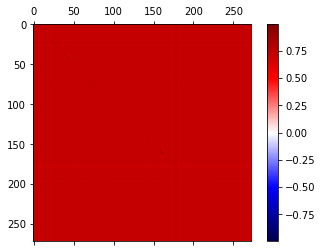

In [22]:
fig, ax = plt.subplots()
v = np.max(np.abs(D))
out = ax.matshow(np.imag(D), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()